# Shoe Recognition using Tensorflow and Resnet Transfer Learning with 97% accuracy.

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/sandals/image292.jpeg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/soccer_shoes/image292.jpeg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/sneakers/image297.jpg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/boots/image292.jpeg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/flip_flops/image292.jpeg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/loafers/image292.jpeg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/sandals/image170.jpeg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/soccer_shoes/image233.jpg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/sneakers/image233.jpg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/boots/image233.jpg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/flip_flops/image170.jpeg
/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/t

In [18]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
for dirpath, dirnames, filenames in os.walk("/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 6 directories and 0 images in '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/' .
There are 0 directories and 249 images in '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/sandals' .
There are 0 directories and 249 images in '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/soccer_shoes' .
There are 0 directories and 249 images in '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/sneakers' .
There are 0 directories and 249 images in '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/boots' .
There are 0 directories and 249 images in '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/flip_flops' .
There are 0 directories and 249 images in '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/loafers' .


In [19]:
import pathlib
import numpy as np
train_dir = "/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/training/"
test_dir = "/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/"
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['boots' 'flip_flops' 'loafers' 'sandals' 'sneakers' 'soccer_shoes']


In [20]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class, size=22)
    plt.axis("off")
    print(f'Image shape: {img.shape}')
    return img

['image193.jpeg']
Image shape: (630, 1200, 3)


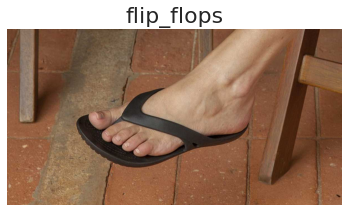

In [21]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_data_gen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="categorical")

test_data = test_data_gen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 1493 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dense, Activation, Dropout

In [24]:
tf.random.set_seed(4)

model1 = Sequential([Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
                   Conv2D(10, 3, activation="relu"),
                   MaxPool2D(),
                   Dropout(0.1),
                   Conv2D(10, 3, activation="relu"),
                   Conv2D(10, 3, activation="relu"),
                   Dropout(0.1),
                   MaxPool2D(),
                   Flatten(),
                   Dense(6, activation="softmax")])

In [25]:
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
dropout_3 (Dropout)          (None, 106, 106, 10)     

In [27]:
history1 = model1.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps=len(test_data))

Epoch 1/50
47/47 [==============================] - 37s 774ms/step - loss: 1.7992 - accuracy: 0.1822 - val_loss: 1.7661 - val_accuracy: 0.1767
Epoch 2/50
47/47 [==============================] - 34s 721ms/step - loss: 1.6871 - accuracy: 0.2813 - val_loss: 1.7049 - val_accuracy: 0.3733
Epoch 3/50
47/47 [==============================] - 33s 709ms/step - loss: 1.5322 - accuracy: 0.3952 - val_loss: 1.6465 - val_accuracy: 0.4200
Epoch 4/50
47/47 [==============================] - 34s 726ms/step - loss: 1.4041 - accuracy: 0.4575 - val_loss: 1.4678 - val_accuracy: 0.4300
Epoch 5/50
47/47 [==============================] - 34s 715ms/step - loss: 1.1244 - accuracy: 0.5894 - val_loss: 1.4802 - val_accuracy: 0.4533
Epoch 6/50
47/47 [==============================] - 34s 726ms/step - loss: 0.7487 - accuracy: 0.7482 - val_loss: 1.6790 - val_accuracy: 0.4833
Epoch 7/50
47/47 [==============================] - 34s 718ms/step - loss: 0.3416 - accuracy: 0.8962 - val_loss: 1.9015 - val_accuracy: 0.4733

In [28]:
model1.evaluate(test_data)

10/10 [==============================] - 5s 545ms/step - loss: 3.8657 - accuracy: 0.4367


[3.8657381534576416, 0.43666666746139526]

In [29]:
model1.evaluate(test_data)

10/10 [==============================] - 6s 544ms/step - loss: 3.8657 - accuracy: 0.4367


[3.8657381534576416, 0.43666666746139526]

In [30]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

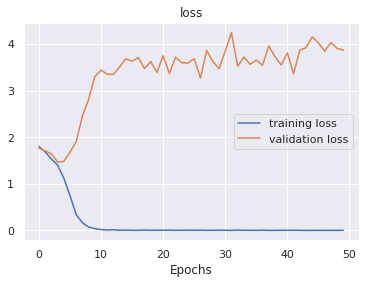

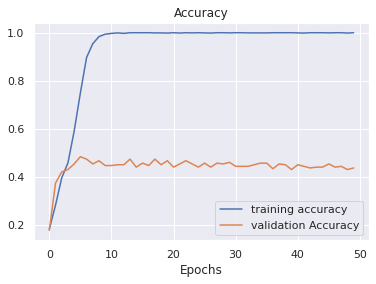

In [31]:
plot_loss_curves(history1)

In [32]:
def load_and_prep_image(filename, img_shape=224):
    '''
    This function reads and image and formats it
    
    Input:
    - filename: path to image file
    - img_shape: preferred shape of image
    
    Output:
    img: formatted image
    '''
    
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img)
    
    img = tf.image.resize(img, size=[224, 224])
    
    img = img/255.
    
    return img


def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename, img_shape=224)
    pred = model.predict(tf.expand_dims(img, 0))
    index = tf.argmax(pred[0])
    print(index)
    prediction = class_names[int(index)]
    plt.imshow(img)
    plt.title(f'Prediction: {prediction}')
    plt.axis(False)

tf.Tensor(3, shape=(), dtype=int64)


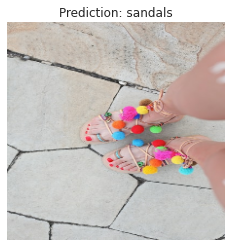

In [33]:
image = "/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/sandals/image250.jpg"
pred_and_plot(model1, image, class_names=class_names)

### The first model is overfitted since the validation error is very low. Let's attempt regularization techniques in our next model.

In [34]:
tf.random.set_seed(4)

model2 = Sequential([Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
                   Conv2D(10, 3, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.3)),
                   MaxPool2D(2,2),
                   Dropout(0.2),
                   Conv2D(10, 3, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.3)),
                   MaxPool2D(2,2),
                   Dropout(0.2),
                   Conv2D(10, 3, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.3)),
                   MaxPool2D(2,2),
                   Dropout(0.4),
                   Conv2D(10, 3, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.3)),
                   Dropout(0.2),
                   Flatten(),
                   Dense(6, activation="softmax")])

In [35]:
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 10)       

In [36]:
history2 = model2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 721ms/step - loss: 10.0094 - accuracy: 0.1768 - val_loss: 6.9502 - val_accuracy: 0.2433
Epoch 2/5
47/47 [==============================] - 33s 698ms/step - loss: 5.2210 - accuracy: 0.1681 - val_loss: 3.8434 - val_accuracy: 0.1700
Epoch 3/5
47/47 [==============================] - 33s 697ms/step - loss: 3.0993 - accuracy: 0.1909 - val_loss: 2.5482 - val_accuracy: 0.1867
Epoch 4/5
47/47 [==============================] - 32s 695ms/step - loss: 2.2315 - accuracy: 0.2438 - val_loss: 1.9884 - val_accuracy: 0.2600
Epoch 5/5
47/47 [==============================] - 33s 703ms/step - loss: 1.8635 - accuracy: 0.3021 - val_loss: 1.7651 - val_accuracy: 0.3467


tf.Tensor(4, shape=(), dtype=int64)


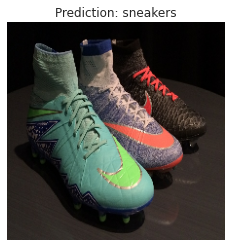

In [37]:
image = "/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/soccer_shoes/image263.jpeg"
pred_and_plot(model2, image, class_names=class_names)

### As the accuracy of this model is very low, it is no surprise that it misclassified a soccer shoe as a sneaker. Let's attempt to use trandsfer learning to build a high performing image classifier since the dataset is too little for the model to fit.

## Using Transfer learning

### Resnet Model

In [38]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# effiecient net 
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [39]:
import tensorflow_hub as hub
from tensorflow.keras import layers

def create_model(model_url, num_classes=10):
    feature_extractor_layer = hub.KerasLayer(model_url, trainable=False, name='FEL', input_shape=(224, 224, 3))
    
    model = tf.keras.Sequential([feature_extractor_layer,
                                tf.keras.layers.Dense(num_classes, activation="softmax", name="outputlayers")])
    return model

In [40]:
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

In [41]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FEL (KerasLayer)             (None, 2048)              23564800  
_________________________________________________________________
outputlayers (Dense)         (None, 6)                 12294     
Total params: 23,577,094
Trainable params: 12,294
Non-trainable params: 23,564,800
_________________________________________________________________


In [42]:
resnet_model.save('resnet_model.h5')

In [43]:
resnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

In [44]:
resnet_history = resnet_model.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data)

Epoch 1/10
47/47 [==============================] - 38s 736ms/step - loss: 1.2537 - accuracy: 0.5385 - val_loss: 0.8738 - val_accuracy: 0.7067
Epoch 2/10
47/47 [==============================] - 33s 696ms/step - loss: 0.6479 - accuracy: 0.7810 - val_loss: 0.8224 - val_accuracy: 0.7433
Epoch 3/10
47/47 [==============================] - 33s 710ms/step - loss: 0.4893 - accuracy: 0.8406 - val_loss: 0.6908 - val_accuracy: 0.7800
Epoch 4/10
47/47 [==============================] - 33s 707ms/step - loss: 0.3905 - accuracy: 0.8841 - val_loss: 0.6772 - val_accuracy: 0.7800
Epoch 5/10
47/47 [==============================] - 33s 697ms/step - loss: 0.3122 - accuracy: 0.9129 - val_loss: 0.6803 - val_accuracy: 0.7733
Epoch 6/10
47/47 [==============================] - 33s 707ms/step - loss: 0.2586 - accuracy: 0.9357 - val_loss: 0.6684 - val_accuracy: 0.7733
Epoch 7/10
47/47 [==============================] - 33s 704ms/step - loss: 0.2203 - accuracy: 0.9605 - val_loss: 0.6592 - val_accuracy: 0.7967

In [45]:
resnet_model.evaluate(test_data)

10/10 [==============================] - 6s 552ms/step - loss: 0.6644 - accuracy: 0.7800


[0.6644436717033386, 0.7799999713897705]

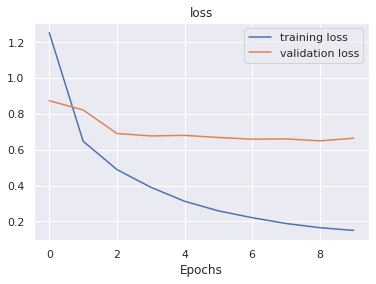

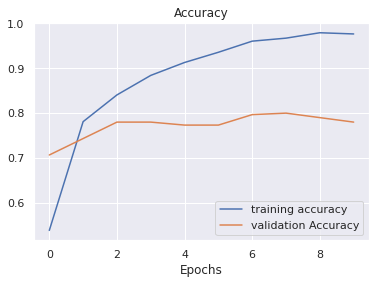

In [46]:
plot_loss_curves(resnet_history)

tf.Tensor(0, shape=(), dtype=int64)


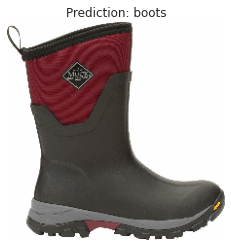

In [47]:
image = "/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/boots/image254.jpg"
pred_and_plot(resnet_model, image, class_names=class_names)

### Efficient Net Model

In [48]:
efficient_model = create_model(efficientnet_url,
                              num_classes=train_data.num_classes)

In [49]:
efficient_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

In [50]:
efficient_history = efficient_model.fit(train_data,
                                     epochs=10,
                                     steps_per_epoch=len(train_data),
                                     validation_data=test_data)

Epoch 1/10
47/47 [==============================] - 42s 732ms/step - loss: 1.3402 - accuracy: 0.5177 - val_loss: 0.9901 - val_accuracy: 0.6767
Epoch 2/10
47/47 [==============================] - 33s 695ms/step - loss: 0.7945 - accuracy: 0.7642 - val_loss: 0.7598 - val_accuracy: 0.7567
Epoch 3/10
47/47 [==============================] - 33s 699ms/step - loss: 0.6172 - accuracy: 0.8218 - val_loss: 0.6825 - val_accuracy: 0.8033
Epoch 4/10
47/47 [==============================] - 33s 711ms/step - loss: 0.5249 - accuracy: 0.8439 - val_loss: 0.6247 - val_accuracy: 0.8100
Epoch 5/10
47/47 [==============================] - 33s 697ms/step - loss: 0.4601 - accuracy: 0.8721 - val_loss: 0.6041 - val_accuracy: 0.8167
Epoch 6/10
47/47 [==============================] - 33s 706ms/step - loss: 0.4059 - accuracy: 0.9015 - val_loss: 0.5956 - val_accuracy: 0.8200
Epoch 7/10
47/47 [==============================] - 33s 699ms/step - loss: 0.3669 - accuracy: 0.9123 - val_loss: 0.5809 - val_accuracy: 0.8233

In [51]:
efficient_model.evaluate(test_data)

10/10 [==============================] - 6s 550ms/step - loss: 0.5696 - accuracy: 0.8233


[0.5695517659187317, 0.8233333230018616]

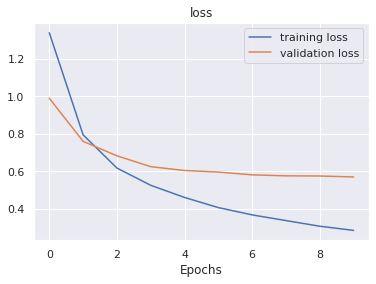

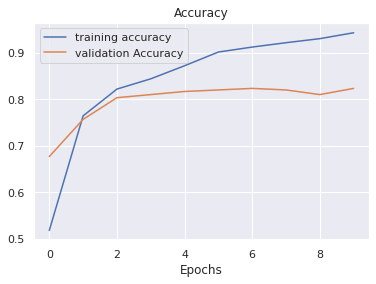

In [52]:
plot_loss_curves(efficient_history)

tf.Tensor(2, shape=(), dtype=int64)


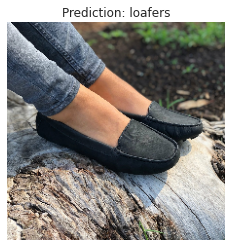

In [53]:
image = "/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/loafers/image253.jpeg"
pred_and_plot(efficient_model, image, class_names=class_names)

tf.Tensor(1, shape=(), dtype=int64)


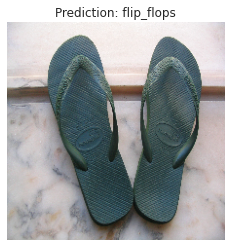

In [54]:
image = "/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/flip_flops/image276.jpeg"
pred_and_plot(efficient_model, image, class_names=class_names)

tf.Tensor(2, shape=(), dtype=int64)


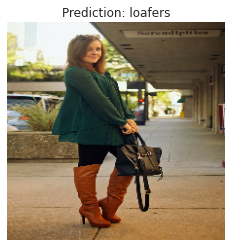

In [55]:
image = '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/boots/image265.jpeg'
pred_and_plot(efficient_model, image, class_names=class_names)

tf.Tensor(3, shape=(), dtype=int64)


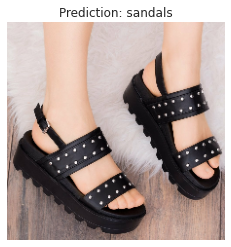

In [56]:
image = '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/sandals/image260.jpeg'
pred_and_plot(efficient_model, image, class_names=class_names)

tf.Tensor(4, shape=(), dtype=int64)


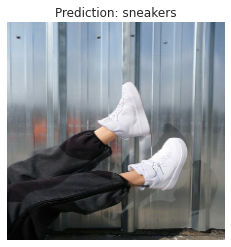

In [57]:
image = '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/sneakers/image277.jpg'
pred_and_plot(efficient_model, image, class_names=class_names)

tf.Tensor(5, shape=(), dtype=int64)


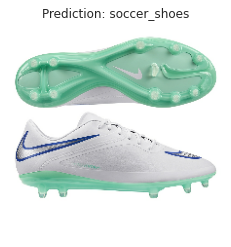

In [58]:
image = '/kaggle/input/shoe-dataset/shoeTypeClassifierDataset/validation/soccer_shoes/image264.jpeg'
pred_and_plot(efficient_model, image, class_names=class_names)

### The Efficient Net Model performed best on the validation data while the ResNet Model had the highest train accuracy. Hence, the best model for this task would be the Efficient Net Model.

In [59]:
efficient_model.save('model.h5')